In [54]:
from bs4 import BeautifulSoup
import requests

def naverblog():
    url = "https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%ED%95%9C%EC%98%A5%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%98%A4%EB%A1%AF"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
   
    posts = []
   
    # 블로그 포스트 정보 가져오기
    items = soup.select('.view_wrap')
   
    for item in items[:3]:
        title = item.select_one('.title_area').text.strip()  # 제목 가져오기
        desc = item.select_one('.dsc_area')
        if desc:
            posts.append({
                'title': title,  # 제목 추가
                'description': desc.text.strip()
            })
        else:
            posts.append({
                'title': title,  # 제목 추가
                'description': 'No description available'
            })

    return posts  # posts 리스트 반환

# 블로그 내용 가져오기
blog_contents = naverblog()

# 가져온 내용 확인
for content in blog_contents:
    print(content)

{'title': "[여주여행] 내돈내산 '한옥스테이 오롯' 한옥독채 여주 숙소에서 여유와 평화로움을 느끼다", 'description': '한옥스테이 오롯에서 가족여행 경기도 여주에 새로 생긴 신상 #여주숙소 [한옥스테이 오롯] 을 갔다 위치는 광주원주고속도로 근방에 있고 남한강 근처에 있어서 이 지역을 지나거나... 발견한 #오롯한옥스테이 너무너무 좋았다 다음번 엄마 추모원 다녀오는 길에도 이곳 숙소 이용하게 될것 같다 조용한 작은 한옥마을에 자리잡은 오롯. 쉬어감을 원하는 여행객에게 좋은...'}
{'title': '서울근교 촌캉스 여주한옥펜션 “한옥스테이 오롯” 내돈내산 이용 후기', 'description': '고급진 한옥 날 좋은 날 방문하니 하늘과 너무 잘 어울려서 1시간이내라 가깝지만 여행 온 느낌이 나네요 체크인 셀프 체크인 15:00 체크아웃 11:00 바베큐 이용시 3만원 기준인원 4명 최대 6명(인원 추가시 2만원) 마당 앞 주차 가능 아주 큰 거실 및 주방, 방1, 화장실1로 구성 4인이 이용하기 최적인 한옥스테이 오롯 최대 6인까지 가능하기에 가족단위나 커플들도 편하게 이용...'}
{'title': '여주 한옥 독채 촌캉스 : 한옥스테이 오롯 에어비앤비 후기', 'description': '여주 촌캉스 : 한옥스테이 오롯 에어비앤비 후기 즉흥적으로 이틀 전 멤버 모으고 숙소 예약한 촌캉스 정말 계획도 없이 갔지만 즐거웠으니 이백여년 만에 포스팅 해본다 그 전에 나와... 그렇게 간 곳은 10시 차슈 픽업 11시 다니 픽업 12시 반에 만나서 하나로마트에서 장 보고 1시 반 즈음에 밥 먹기엔 저녁을 못 먹을 것 같아서 브런치로 떼우기로 함 한옥 촌캉스니 카페도...'}


In [65]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import time

def airbnbreview():
    # Chrome 드라이버 설정
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # 브라우저 창을 열지 않음
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    # Airbnb 페이지 열기
    url = "https://www.airbnb.co.kr/rooms/946769154375210325?_set_bev_on_new_domain=1734065600_EAZmJmMWYxNWY4Nz&source_impression_id=p3_1734065600_P3YQc4xA4wu5n9vK"
    driver.get(url)

    time.sleep(5)  # 페이지 로딩 시간

    # "후기 20개 모두 보기" 버튼을 찾아서 클릭하기
    try:
        more_button = driver.find_element(By.XPATH, '//button[@aria-label="후기 20개 모두 보기, 모달 대화를 엽니다."]')
        more_button.click()  # 버튼 클릭
        time.sleep(3)  # 클릭 후 페이지가 업데이트될 시간을 기다립니다
    except:
        print("No 'More' button found.")

    # 스크롤 내려서 리뷰 로드하기
    for _ in range(3):  # 스크롤 3번 내리기 (더 많은 리뷰를 로드)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)  # 스크롤 후 잠시 대기

    # 페이지 소스 가져오기
    soup = BeautifulSoup(driver.page_source, "html.parser")

    posts = []

    # 리뷰 내용 가져오기
    items = soup.select('div.r1bctolv ')  # 리뷰 내용이 있는 div 선택

    for item in items[:20]:  # 첫 20개의 리뷰 가져오기
        desc = item.text.strip()
        posts.append({
            'description': desc
        })

    driver.quit()  # 드라이버 종료

    return posts  # posts 리스트 반환

# 리뷰 내용 가져오기
reviews = airbnbreview()

# 가져온 내용 확인
for content in reviews:
    print(content)

{'description': '가족들의 추억만들기에 최적의 장소'}
{'description': '적당한 모임으로 이쁘게 놀기 적당한 장소입니다 사진도 이쁘게 찍히고 방도 넓어서 놀기 딱 좋아요'}
{'description': '깨끗하고 넓고 편의시설도 잘구비되어있고사장님이 친절하게 질의응답해주십니다'}
{'description': '위치도 좋고 주변 경관도 너무 예뻤어요4인 기준인데 한옥이 엄청 커서 이곳저곳 누비면서 썼네요부엌에 식기류와 소스류도 많고 화장실도 쾌적하고 잘 썼습니다여름이라 벌레가 많았는데 향 피우는거 넉넉히 두셔서 벌레퇴치에 잘 썼어요바베큐 신청 후 숯만 조금 주셔서 아쉬웠어요 ㅠ.ㅠ빠르게 불 피워서 후딱 구워먹지 않으면 불이 금방 없어지고여름이라 눅눅해서 나무로 된 한옥이 조금 냄새가 납니다이런거 상관없으시면 아주 좋아요 가격도 넘 좋고요!야외에 불 켜는거 너무 예쁩니다 선선할때 또 오려구요!'}
{'description': '두명이서 힐링차 방문했습니다.마을이 너무 조용하고 아늑한 분위기였어요.  숙소가 생각보다 크고 식기, 냉장고(가정용으로 크고 깨끗함) , 취사용품 등이 다양해서 좋았어요.저희가 궁금한점 여쭤봤는데 바로바로 연락주셔서 지내는데 많은 도움이 됐어요!바베큐를 했는데 야외바베큐 테이블, 전등이 너무 예쁘고 토치랑 숯이 준비되어 있어서 간편하게 했어요. (그릴뚜껑이 있는 제품이라 조리시 더 유용했습니다) + 여름 야외라 너무 더울까 걱정했는데 강력 선풍기가 있어서 조금 도움 됐습니다. 여름에 방문하는 것도 좋은데 겨울에  방문하면 더 즐기기 좋을것 같아요!'}
{'description': '숙소가 생각보다 안쪽에 있어서 찾기 힘들었는데 너무 청결하고 깔끔해서 좋았습니다!! 친구들과 좋은 추억 남기고 돌아왔어요~'}
{'description': '가족들의 추억만들기에 최적의 장소'}
{'description': '적당한 모임으로 이쁘게 놀기 적당한 장소입니다 사진도 이쁘게 찍히고 방도 넓어서 놀기 딱 좋아요'}
{'descri

In [83]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 24.3 MB/s eta 0:00:00


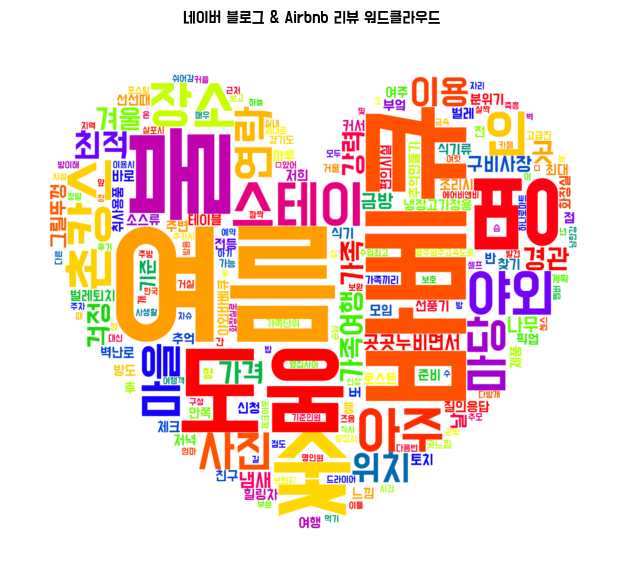

<Figure size 640x480 with 0 Axes>

In [111]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
from konlpy.tag import Okt
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from matplotlib import font_manager

# Airbnb 리뷰 크롤링
def airbnbreview():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # 브라우저 창을 열지 않음
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    url = "https://www.airbnb.co.kr/rooms/946769154375210325?_set_bev_on_new_domain=1734065600_EAZmJmMWYxNWY4Nz&source_impression_id=p3_1734065600_P3YQc4xA4wu5n9vK"
    driver.get(url)

    time.sleep(5)

    try:
        more_button = driver.find_element(By.XPATH, '//button[@aria-label="후기 20개 모두 보기, 모달 대화를 엽니다."]')
        more_button.click()
        time.sleep(3)
    except:
        print("No 'More' button found.")

    for _ in range(3):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)

    soup = BeautifulSoup(driver.page_source, "html.parser")
    posts = []
    items = soup.select('div.r1bctolv ')

    for item in items[:20]:
        desc = item.text.strip()
        posts.append({'description': desc})

    driver.quit()
    return posts

# 네이버 블로그 크롤링
def naverblog():
    url = "https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%ED%95%9C%EC%98%A5%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%98%A4%EB%A1%AF"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    posts = []
    items = soup.select('.view_wrap')

    for item in items[:3]:
        title = item.select_one('.title_area').text.strip()
        desc = item.select_one('.dsc_area')
        if desc:
            posts.append({'title': title, 'description': desc.text.strip()})
        else:
            posts.append({'title': title, 'description': 'No description available'})

    return posts

# 명사 추출 함수 (특정 단어 제외)
def get_compound_nouns(text, exclude_words=[]):
    okt = Okt()
    tokens = text.split()
    combined_nouns = []
    current_combined = ""

    for token in tokens:
        nouns = okt.nouns(token)

        for noun in nouns:
            # 제외할 단어가 있으면 필터링
            if noun in exclude_words:
                continue

            if current_combined:
                current_combined += noun
            else:
                current_combined = noun

            if not (current_combined and (nouns.index(noun) < len(nouns) - 1)):
                combined_nouns.append(current_combined)
                current_combined = ""

    if current_combined:
        combined_nouns.append(current_combined)

    return combined_nouns

# 워드클라우드 생성
def generate_wordcloud():
    # Airbnb 리뷰와 네이버 블로그 크롤링 데이터 결합
    airbnb_reviews = airbnbreview()
    blog_contents = naverblog()

    combined_text = ""
    
    # Airbnb 리뷰에서 내용 추출
    for review in airbnb_reviews:
        combined_text += review['description'] + " "
    
    # 네이버 블로그에서 내용 추출
    for blog in blog_contents:
        combined_text += blog['description'] + " "

    # 제외할 단어 목록 (예: '숙소' 제외)
    exclude_words = ['숙소','조금','것','방문','오롯','옥','한옥스테이','옥스테이','생각','더','롯']

    # 명사 추출 (제외할 단어를 전달)
    words = get_compound_nouns(combined_text, exclude_words=exclude_words)

    # 빈도수 계산
    unique_words, counts = np.unique(words, return_counts=True)
    freq = dict(zip(unique_words, counts))

    # 워드클라우드 이미지 생성
    mask_image = np.array(Image.open('heart.jpg'))
    fontpath = r"C:\Users\enjoy\python_202412\fonts\DoHyeon-Regular.ttf"
    
    font_manager.fontManager.addfont(fontpath)
    plt.rc('font', family='Do Hyeon')
    plt.rcParams['axes.unicode_minus'] = False

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=fontpath,
        mask=mask_image,
        contour_color='white',
        contour_width=1,
        colormap='prism'
    ).generate_from_frequencies(freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('네이버 블로그 & Airbnb 리뷰 워드클라우드')
    plt.show()
    plt.savefig('airbnb_word.png', format='png')  #이미지로 저장
    
# 워드클라우드 생성 실행
generate_wordcloud()